Methods #3 -- Interpolate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('D:\Paper_Imputation\data\dataset_mitigasi_banjir_fix_banget.csv')

data.head()

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\UsHER\AppData\Local\Temp\ipykernel_10680\3408066250.py:6: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('D:\Paper_Imputation\data\dataset_mitigasi_banjir_fix_banget.csv')


,Tanggal,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
0,2015-01-01,33.0,1.0,130.50,5.63
1,2015-01-02,0.0,NaN,93.50,4.98
2,2015-01-03,0.0,20.5,79.12,4.69
3,2015-01-04,11.5,2.0,91.08,4.94
4,2015-01-05,2.0,NaN,76.00,4.61


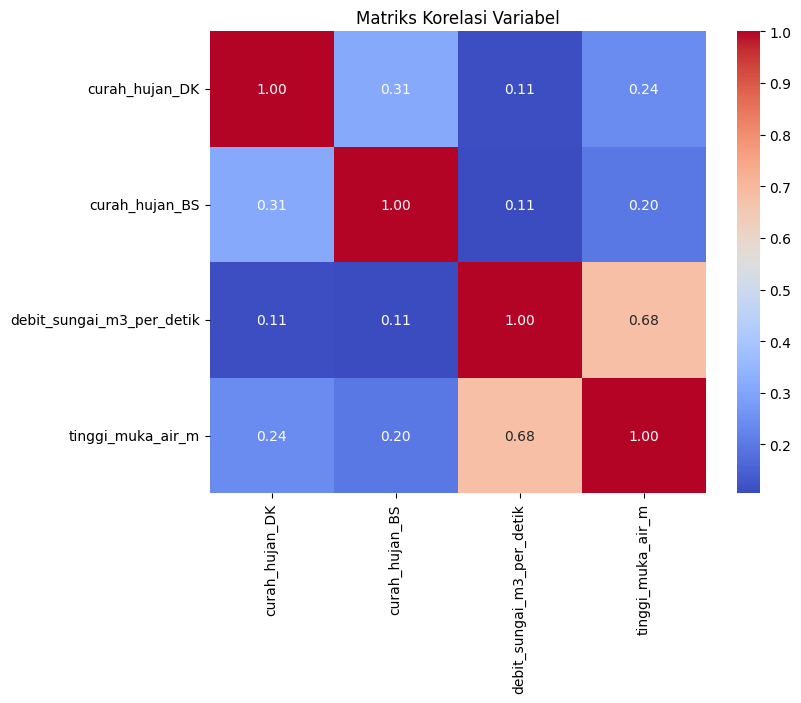

In [13]:
# Mengonversi kolom "Tanggal" ke tipe data datetime (agar tidak mengganggu perhitungan)
data["Tanggal"] = pd.to_datetime(data["Tanggal"], errors="coerce")

# Memastikan hanya kolom numerik yang digunakan untuk korelasi
numeric_data = data.select_dtypes(include=["number"])

# Hitung korelasi antar variabel numerik
correlation_matrix = numeric_data.corr()

# Visualisasi menggunakan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Variabel")
plt.show()


1. Korelasi Kuat antara Debit Sungai dan Tinggi Muka Air (0.68)
    -Debit sungai_m3_per_detik vs. Tinggi muka air_m = 0.68
    -Korelasi positif kuat, artinya ketika debit sungai meningkat, tinggi muka air juga cenderung meningkat.

2. Korelasi Lemah antara Curah Hujan dan Tinggi Muka Air (0.24 - 0.20)
    -Curah hujan DK vs. Tinggi muka air = 0.24
    -Curah hujan BS vs. Tinggi muka air = 0.20
    -Korelasi lemah, artinya curah hujan tidak selalu menyebabkan tinggi muka air meningkat secara langsung.
    
3. Korelasi Rendah antara Curah Hujan dan Debit Sungai (0.11)
    -Curah hujan DK vs. Debit sungai = 0.11
    -Curah hujan BS vs. Debit sungai = 0.11
    -Ini menunjukkan bahwa hujan di satu lokasi tidak selalu meningkatkan debit sungai secara langsung.

Kesimpulan
- Debit sungai dan tinggi muka air memiliki hubungan paling kuat (0.68). Artinya, jika ingin memprediksi tinggi muka air, debit sungai adalah variabel yang paling berpengaruh.
- Curah hujan tidak memiliki hubungan yang kuat dengan tinggi muka air atau debit sungai.

In [18]:
df_interp = data.copy()

In [19]:
df_interp['Tanggal'] = pd.to_datetime(df_interp['Tanggal'], errors='coerce')
df_interp = df_interp.sort_values(by='Tanggal')
df_interp.set_index('Tanggal', inplace=True)

df_interp.head()

,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m,curah_hujan_DK_lag1,curah_hujan_BS_lag1,debit_sungai_lag1,curah_hujan_DK_lag2,debit_sungai_lag2
Tanggal,,,,,,,,,
2015-01-01,33.0,1.0,130.50,5.63,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.0,NaN,93.50,4.98,33.0,1.0,130.50,NaN,NaN
2015-01-03,0.0,20.5,79.12,4.69,0.0,NaN,93.50,33.0,130.50
2015-01-04,11.5,2.0,91.08,4.94,0.0,20.5,79.12,0.0,93.50
2015-01-05,2.0,NaN,76.00,4.61,11.5,2.0,91.08,0.0,79.12


In [20]:
columns_to_drop = ["curah_hujan_DK_lag1", "curah_hujan_BS_lag1", "debit_sungai_lag1", 
                   "curah_hujan_DK_lag2", "debit_sungai_lag2"]

df_new = df_interp.drop(columns=columns_to_drop, errors="ignore")

numeric_cols = ['curah_hujan_DK', 'curah_hujan_BS', 'debit_sungai_m3_per_detik', 'tinggi_muka_air_m']
df_interp[numeric_cols] = df_interp[numeric_cols].interpolate(method='time', limit_direction='forward')

print("Jumlah missing values setelah interpolasi:")
print(df_interp.isnull().sum())

Jumlah missing values setelah interpolasi:
curah_hujan_DK                  0
curah_hujan_BS                  0
debit_sungai_m3_per_detik       0
tinggi_muka_air_m               0
curah_hujan_DK_lag1          1753
curah_hujan_BS_lag1          1676
debit_sungai_lag1               5
curah_hujan_DK_lag2          1754
debit_sungai_lag2               6
dtype: int64


In [21]:
df_new.head(50)

,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
Tanggal,,,,
2015-01-01,33.0,1.0,130.50,5.63
2015-01-02,0.0,NaN,93.50,4.98
2015-01-03,0.0,20.5,79.12,4.69
2015-01-04,11.5,2.0,91.08,4.94
2015-01-05,2.0,NaN,76.00,4.61
2015-01-06,NaN,NaN,55.80,4.14
2015-01-07,NaN,1.0,57.57,4.19
2015-01-08,NaN,NaN,43.34,3.80
2015-01-09,NaN,NaN,37.55,3.64


In [ ]:
df_interp["Banjir"] = df_interp.apply(
    lambda row: 1 if (row["tinggi_muka_air_m"] > 4.8 and 
                      row["curah_hujan_DK"] > 10 and 
                      row["curah_hujan_BS"] > 10 and 
                      row["debit_sungai_m3_per_detik"] > 100) else 0, axis=1)

df_interp.head(50)

,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m,Banjir
Tanggal,,,,,
2015-01-01,33.0,1.000000,130.50,5.63,0
2015-01-02,0.0,10.750000,93.50,4.98,0
2015-01-03,0.0,20.500000,79.12,4.69,0
2015-01-04,11.5,2.000000,91.08,4.94,0
2015-01-05,2.0,1.666667,76.00,4.61,0
2015-01-06,3.0,1.333333,55.80,4.14,0
2015-01-07,4.0,1.000000,57.57,4.19,0
2015-01-08,5.0,1.000000,43.34,3.80,0
2015-01-09,6.0,1.000000,37.55,3.64,0


In [7]:
df_banjir = df_interp[df_interp["Banjir"] == 1]

print(df_banjir)

            curah_hujan_DK  curah_hujan_BS  debit_sungai_m3_per_detik  \
Tanggal                                                                 
2015-01-25            26.5           35.00                     101.97   
2015-02-07            14.0           12.00                     147.09   
2015-03-19            14.5           18.00                     109.64   
2015-03-28            28.0           27.50                     107.40   
2015-04-02            56.0           31.25                     156.26   
...                    ...             ...                        ...   
2022-12-05            27.5           23.50                     134.18   
2022-12-07            30.0           21.00                     116.51   
2022-12-08            14.0           21.00                     123.81   
2022-12-12            53.5           35.00                     126.20   
2022-12-18            20.0           23.00                     130.98   

            tinggi_muka_air_m  Banjir  
Tanggal   

In [8]:
jumlah_banjir = df_interp["Banjir"].sum()

print(f"jumlah kejadian banjir = {jumlah_banjir}")

jumlah kejadian banjir = 90


In [9]:
hujan = len(df_interp)

print(f"total hujan = {hujan}")

total hujan = 3287


In [ ]:
tidak_banjir = (df_interp["Banjir"] == 0).sum()
print(f"Jumlah kejadian tidak banjir: {tidak_banjir}")


Jumlah kejadian tidak banjir: 3197


Model Training start from here